In [27]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

data_folder = '/Users/zhaomengshan/Desktop/Air_pollution/PM2.5_10km'  
output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5'  
china_cities = gpd.read_file('/Users/zhaomengshan/Desktop/Air_pollution/CHN_adm/CHN_adm2.shp')  

# Iterate through each year folder
for year_folder in os.listdir(data_folder):
    year_path = os.path.join(data_folder, year_folder)
    
    if os.path.isdir(year_path):
        city_level_data = pd.DataFrame()

        # Process each CSV file in the current year folder
        for file in os.listdir(year_path):
            if file.endswith(".csv"):
                file_path = os.path.join(year_path, file)
                
                # Obtain the date information
                date = file.split('_')[0]  
                date = pd.to_datetime(date, format='%Y%m%d')  
                
                daily_data = pd.read_csv(file_path)
                
                geometry = [Point(xy) for xy in zip(daily_data['X_Lon'], daily_data['Y_Lat'])]
                grid_gdf = gpd.GeoDataFrame(daily_data, geometry=geometry)
                
                grid_gdf.crs = "EPSG:4326" 
                grid_cities = gpd.sjoin(grid_gdf, china_cities, how="left", op='within')
            
                # Group once and calculate all averages
                agg_data = grid_cities.groupby(['NAME_1', 'NAME_2']).agg(
                    pm25_avg=('PM2.5', 'mean'),
                    SO4_avg=('SO4', 'mean'),
                    NO3_avg=('NO3', 'mean'),
                    NH4_avg=('NH4', 'mean'),
                    OM_avg=('OM', 'mean'),
                    BC_avg=('BC', 'mean')
                ).reset_index()
                
                agg_data['date'] = date

                # Concatenate the daily aggregated data with the city_level_data dataframe
                city_level_data = pd.concat([city_level_data, agg_data], ignore_index=True)

        # Save the final aggregated data for the current year
        city_level_file = os.path.join(output_folder, f"city_level_{year_folder}.csv")
        city_level_data.to_csv(city_level_file, index=False)


/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/I

TimeoutError: [Errno 60] Operation timed out

In [1]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

data_folder = '/Users/zhaomengshan/Desktop/Air_pollution/PM2.5_10km'  
output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5'  
china_cities = gpd.read_file('/Users/zhaomengshan/Desktop/Air_pollution/CHN_adm/CHN_adm2.shp') 

In [2]:
all_city_data = pd.DataFrame()

for file in os.listdir(output_folder):
    if file.startswith("city_level"):
        file_path = os.path.join(output_folder, file)
        print(f"Processing {file_path}")  
        try:
            city_data = pd.read_csv(file_path)
            all_city_data = all_city_data.append(city_data, ignore_index=True)
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

all_city_file = os.path.join(output_folder, "all_city_PM2.5.csv")
all_city_data.to_csv(all_city_file, index=False)


Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2019.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2018.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2024.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2023.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2022.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2008.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2020.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2021.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2009.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2010.csv
Processing /Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/city_level_2004.csv
Processing

In [3]:
all_city_data

,NAME_1,NAME_2,pm25_avg,SO4_avg,NO3_avg,NH4_avg,OM_avg,BC_avg,date
0,Anhui,Anqing,63.659722,13.348819,14.954444,12.089444,15.278889,3.121875,2019-03-19
1,Anhui,Bengbu,74.327273,12.884545,20.600727,12.765636,17.659455,2.922182,2019-03-19
2,Anhui,Bozhou,69.152941,12.704588,19.725529,12.628588,14.858353,3.089412,2019-03-19
3,Anhui,Chaohu,60.528090,11.137191,16.422809,10.633258,12.130787,2.299888,2019-03-19
4,Anhui,Chizhou,45.658537,10.233415,7.891463,7.069146,13.916829,2.777195,2019-03-19
...,...,...,...,...,...,...,...,...,...
3002427,Zhejiang,Quzhou,53.432099,12.678148,12.504074,9.240494,10.934938,1.741728,2014-02-27
3002428,Zhejiang,Shaoxing,73.863014,17.551644,15.927808,11.798767,14.157534,2.680822,2014-02-27
3002429,Zhejiang,Taizhou,39.341176,8.988941,8.078118,6.651647,7.984706,1.812000,2014-02-27
3002430,Zhejiang,Wenzhou,40.800000,9.480571,9.597333,7.274190,7.782571,1.558286,2014-02-27


In [137]:
mean_pm25 = all_city_data['pm25_avg'].mean()
sd_pm25 = all_city_data['pm25_avg'].std()
min_pm25 = all_city_data['pm25_avg'].min()
max_pm25 = all_city_data['pm25_avg'].max()

print(f"Mean: {mean_pm25}")
print(f"Standard Deviation: {sd_pm25}")
print(f"Minimum: {min_pm25}")
print(f"Maximum: {max_pm25}")

Mean: 43.34925975417961
Standard Deviation: 34.38930508880987
Minimum: 1.0
Maximum: 571.6763157894737


In [6]:
# Figures on top 10 most polluted cities' average change during year end

import matplotlib.pyplot as plt

#data_path = '/Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/all_city_PM2.5.csv'
#all_city_data = pd.read_csv(data_path)
all_city_data['date'] = pd.to_datetime(all_city_data['date'])

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each year and select top 10 cities based on yearly average
for year in range(2000, 2024):
    # Calculate the yearly average for each city
    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(10)
    top_cities_names = top_cities.index.tolist()
    print(f"{year}: {', '.join(top_cities_names)}")

    start_date = pd.Timestamp(year=year, month=12, day=1)
    end_date = pd.Timestamp(year=year+1, month=1, day=20)

    # Filter the data for the top cities within the date range
    date_filtered_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]

    # Calculate the daily average for the top 10 cities
    daily_avg = date_filtered_data.groupby('date')['pm25_avg'].mean()

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(daily_avg.index, daily_avg.values)
    
    plt.title(f"Daily Average PM2.5 for Top 10 Cities in {year}")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.savefig(os.path.join(output_folder, f"top_10_cities_avg_pm25_{year}.png"))
    plt.close()

2000: Jiaozuo, Zhengzhou, Langfang, Puyang, Guangzhou, Hengshui, Handan, Liaocheng, Xinxiang, Jinan
2001: Langfang, Jiaozuo, Tai'an, Jinan, Zhengzhou, Liaocheng, Hengshui, Tianjin, Jining, Zaozhuang
2002: Tai'an, Jiaozuo, Hengshui, Liaocheng, Langfang, Jinan, Jining, Zhengzhou, Puyang, Handan
2003: Langfang, Hengshui, Jiaozuo, Liaocheng, Handan, Cangzhou, Puyang, Zhengzhou, Tai'an, Dezhou
2004: Jiaozuo, Langfang, Zhengzhou, Hengshui, Puyang, Liaocheng, Handan, Xinxiang, Xuchang, Tai'an
2005: Jiaozuo, Zhengzhou, Langfang, Xinxiang, Hengshui, Handan, Xuchang, Puyang, Tai'an, Kaifeng
2006: Jiaozuo, Zhengzhou, Langfang, Xuchang, Xinxiang, Liaocheng, Puyang, Hengshui, Kaifeng, Tai'an
2007: Zhengzhou, Jiaozuo, Langfang, Xuchang, Puyang, Xinxiang, Hengshui, Liaocheng, Tai'an, Handan
2008: Jiaozuo, Zhengzhou, Tai'an, Xuchang, Xinxiang, Handan, Langfang, Liaocheng, Zaozhuang, Jining
2009: Jiaozuo, Zhengzhou, Tai'an, Xinxiang, Xuchang, Liaocheng, Puyang, Jining, Kaifeng, Langfang
2010: Jiaozuo, 

In [7]:
# Figures on top 10 less polluted cities' average change during year end

import matplotlib.pyplot as plt

#data_path = '/Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/all_city_PM2.5.csv'
#all_city_data = pd.read_csv(data_path)


# Iterate through each year and select top 10 cities based on yearly average
for year in range(2000, 2024):
    # Calculate the yearly average for each city
    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nsmallest(10)
    top_cities_names = top_cities.index.tolist()
    print(f"{year}: {', '.join(top_cities_names)}")

    start_date = pd.Timestamp(year=year, month=12, day=1)
    end_date = pd.Timestamp(year=year+1, month=1, day=20)

    # Filter the data for the top cities within the date range
    date_filtered_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]

    # Calculate the daily average for the top 10 cities
    daily_avg = date_filtered_data.groupby('date')['pm25_avg'].mean()

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(daily_avg.index, daily_avg.values)
    
    plt.title(f"Daily Average PM2.5 for Top 10 Less Polluted Cities in {year}")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.savefig(os.path.join(output_folder, f"top_10_less_cities_avg_pm25_{year}.png"))
    plt.close()

2000: Sanya, Hainan, DÃªqÃªn Tibetan, Jiamusi, Daxing'anling, Hegang, Nujiang Lisu, GarzÃª Tibetan, Shuangyashan, Heihe
2001: Sanya, Daxing'anling, DÃªqÃªn Tibetan, Hainan, Nujiang Lisu, GarzÃª Tibetan, Nyingtri, Lijiang, Shigatse, Chamdo
2002: Sanya, Daxing'anling, DÃªqÃªn Tibetan, Hainan, Nujiang Lisu, GarzÃª Tibetan, Nyingtri, Hulunbuir, Chamdo, Shigatse
2003: Daxing'anling, DÃªqÃªn Tibetan, Nujiang Lisu, Sanya, GarzÃª Tibetan, Nyingtri, Chamdo, Shigatse, Hulunbuir, Shannan
2004: Daxing'anling, DÃªqÃªn Tibetan, Nujiang Lisu, GarzÃª Tibetan, Nyingtri, Sanya, Chamdo, Shigatse, Hulunbuir, Shannan
2005: Daxing'anling, DÃªqÃªn Tibetan, Hegang, Nujiang Lisu, GarzÃª Tibetan, Nyingtri, Heihe, Hulunbuir, Chamdo, Shigatse
2006: Daxing'anling, DÃªqÃªn Tibetan, GarzÃª Tibetan, Nujiang Lisu, Nyingtri, Sanya, Hulunbuir, Chamdo, Shigatse, Hegang
2007: Daxing'anling, DÃªqÃªn Tibetan, Nujiang Lisu, Nyingtri, GarzÃª Tibetan, Hegang, Chamdo, Shigatse, Sanya, Shannan
2008: DÃªqÃªn Tibetan, Daxing'anlin

In [15]:
output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure/Province_top10'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

daily_avg_all_top_cities = pd.DataFrame()

for year in range(2000, 2024):
    start_date = pd.Timestamp(year=year, month=12, day=1)
    end_date = pd.Timestamp(year=year+1, month=1, day=20)
    
    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    
    top_cities = yearly_data.groupby(['NAME_1', 'NAME_2'])['pm25_avg'].mean().groupby(level=0, group_keys=False).nlargest(10).reset_index()
    top_cities_names = top_cities['NAME_2'].tolist()
    
    date_filtered_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    
    daily_avg = date_filtered_data.groupby('date')['pm25_avg'].mean().reset_index()
    daily_avg['year'] = year
    
    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(daily_avg.date, daily_avg.pm25_avg)
    
    plt.title(f"Daily Average PM2.5 for Top 10 Polluted Cities in {year}")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.savefig(os.path.join(output_folder, f"top_10_cities_avg_pm25_{year}.png"))
    plt.close()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure'

# Get unique provinces
provinces = all_city_data['NAME_1'].unique()

for province in provinces:
    province_data = all_city_data[all_city_data['NAME_1'] == province]

    for year in range(2000, 2024):
        start_date = pd.Timestamp(year=year, month=12, day=1)
        end_date = pd.Timestamp(year=year+1, month=1, day=20)

        yearly_data = province_data[province_data['date'].dt.year == year]
        
        # Top 5 polluted cities
        top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(5)
        top_cities_names = top_cities.index.tolist()
        
        # Least 5 polluted cities
        least_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nsmallest(5)
        least_cities_names = least_cities.index.tolist()

        # Data for the top 10 cities
        top_cities_data = province_data[
            (province_data['NAME_2'].isin(top_cities_names)) &
            (province_data['date'] >= start_date) &
            (province_data['date'] <= end_date)
        ]
        top_daily_avg = top_cities_data.groupby('date')['pm25_avg'].mean()

        # Data for the least 10 cities
        least_cities_data = province_data[
            (province_data['NAME_2'].isin(least_cities_names)) &
            (province_data['date'] >= start_date) &
            (province_data['date'] <= end_date)
        ]
        least_daily_avg = least_cities_data.groupby('date')['pm25_avg'].mean()

        # Plotting
        plt.figure(figsize=(15, 10))
        plt.plot(top_daily_avg.index, top_daily_avg.values, label='Top 10 Most Polluted')
        plt.plot(least_daily_avg.index, least_daily_avg.values, label='Top 10 Least Polluted')
        
        plt.title(f"Daily Average PM2.5 in {province} ({year})")
        plt.xlabel("Date")
        plt.ylabel("PM2.5 Average")
        plt.legend()
        plt.savefig(os.path.join(output_folder, f"{province}_top_least_polluted_{year}.png"))
        plt.close()


In [23]:
output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure'


for year in range(2000, 2024):
    start_date = pd.Timestamp(year=year, month=12, day=1)
    end_date = pd.Timestamp(year=year+1, month=1, day=20)

    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
        
    # Top 10 polluted cities
    top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(10)
    top_cities_names = top_cities.index.tolist()

    # Least 10 polluted cities
    least_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nsmallest(10)
    least_cities_names = least_cities.index.tolist()

    # Data for the top 10 cities
    top_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    top_daily_avg = top_cities_data.groupby('date')['pm25_avg'].mean()

    # Data for the least 10 cities
    least_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(least_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    least_daily_avg = least_cities_data.groupby('date')['pm25_avg'].mean()

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(top_daily_avg.index, top_daily_avg.values, label='Top 10 Most Polluted')
    plt.plot(least_daily_avg.index, least_daily_avg.values, label='Top 10 Least Polluted')

    plt.title(f"Daily Average PM2.5 in ({year})")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.legend()
    plt.savefig(os.path.join(output_folder, f"top_least_polluted_{year}.png"))
    plt.close()


In [28]:
# top 30 and 31-60 all year

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure/top60'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)



for year in range(2000, 2024):
    start_date = pd.Timestamp(year=year, month=6, day=1)
    end_date = pd.Timestamp(year=year+1, month=2, day=20)

    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    
    # Top 30 polluted cities
    top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(30)
    top_cities_names = top_cities.index.tolist()

    # Next 30 polluted cities 
    next_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(60).tail(30)
    next_cities_names = next_cities.index.tolist()

    # Data for the top 30 cities
    top_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    top_daily_avg = top_cities_data.groupby('date')['pm25_avg'].mean()

    # Data for the next 30
    next_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(next_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    next_daily_avg = next_cities_data.groupby('date')['pm25_avg'].mean()

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(top_daily_avg.index, top_daily_avg.values, label='Top 30 Most Polluted')
    plt.plot(next_daily_avg.index, next_daily_avg.values, label='31th-60th Most Polluted')

    plt.title(f"Daily Average PM2.5 in ({year})")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.legend()
    plt.savefig(os.path.join(output_folder, f"top_60_polluted_{year}.png"))
    plt.close()


In [30]:
# top 30 and 31-60 year end

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure/top60_2'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)



for year in range(2000, 2024):
    start_date = pd.Timestamp(year=year, month=12, day=5)
    end_date = pd.Timestamp(year=year+1, month=1, day=18)

    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    
    # Top 30 polluted cities
    top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(30)
    top_cities_names = top_cities.index.tolist()

    # Next 30 polluted cities 
    next_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(60).tail(30)
    next_cities_names = next_cities.index.tolist()

    # Data for the top 30 cities
    top_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    top_daily_avg = top_cities_data.groupby('date')['pm25_avg'].mean()

    # Data for the next 30
    next_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(next_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    next_daily_avg = next_cities_data.groupby('date')['pm25_avg'].mean()

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(top_daily_avg.index, top_daily_avg.values, label='Top 30 Most Polluted')
    plt.plot(next_daily_avg.index, next_daily_avg.values, label='31th-60th Most Polluted')

    plt.title(f"Daily Average PM2.5 in ({year})")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.legend()
    plt.savefig(os.path.join(output_folder, f"top_60_polluted_{year}.png"))
    plt.close()

In [136]:
# top 20 and least 20 year end

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure/top40_2'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)



for year in range(2000, 2024):
    start_date = pd.Timestamp(year=year, month=12, day=1)
    end_date = pd.Timestamp(year=year+1, month=1, day=10)

    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    
    # Top 20 polluted cities
    top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nlargest(20)
    top_cities_names = top_cities.index.tolist()

    # Least 20
    next_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nsmallest(20)
    next_cities_names = next_cities.index.tolist()

    # Data for the top 20 cities
    top_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    top_daily_avg = top_cities_data.groupby('date')['pm25_avg'].mean()

    # Data for the next 20
    next_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(next_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    next_daily_avg = next_cities_data.groupby('date')['pm25_avg'].mean()

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(top_daily_avg.index, top_daily_avg.values, label='Top 20 Most Polluted')
    plt.plot(next_daily_avg.index, next_daily_avg.values, label='Least 20 Polluted')

    plt.title(f"Daily Average PM2.5 in ({year})")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.legend()
    plt.savefig(os.path.join(output_folder, f"top_40_polluted_{year}.png"))
    plt.close()

In [34]:
# less 30 and 31-60 year end

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure/less60_2'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)



for year in range(2000, 2024):
    start_date = pd.Timestamp(year=year, month=12, day=5)
    end_date = pd.Timestamp(year=year+1, month=1, day=18)

    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    
    # Top 30 polluted cities
    top_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nsmallest(30)
    top_cities_names = top_cities.index.tolist()

    # Next 30 polluted cities 
    next_cities = yearly_data.groupby('NAME_2')['pm25_avg'].mean().nsmallest(60).tail(30)
    next_cities_names = next_cities.index.tolist()

    # Data for the top 30 cities
    top_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(top_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    top_daily_avg = top_cities_data.groupby('date')['pm25_avg'].mean()

    # Data for the next 30
    next_cities_data = all_city_data[
        (all_city_data['NAME_2'].isin(next_cities_names)) &
        (all_city_data['date'] >= start_date) &
        (all_city_data['date'] <= end_date)
    ]
    next_daily_avg = next_cities_data.groupby('date')['pm25_avg'].mean()

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(top_daily_avg.index, top_daily_avg.values, label='Top 30 Least Polluted')
    plt.plot(next_daily_avg.index, next_daily_avg.values, label='31th-60th Least Polluted')

    plt.title(f"Daily Average PM2.5 in ({year})")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Average")
    plt.legend()
    plt.savefig(os.path.join(output_folder, f"less_60_polluted_{year}.png"))
    plt.close()

In [33]:
# geo plot
import geopandas as gpd


#china_cities = gpd.read_file('/Users/zhaomengshan/Desktop/Air_pollution/CHN_adm/CHN_adm2.shp')

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Figure/Yearly_Pollution_Maps'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for year in range(2000, 2024):
    # Filter data for the current year and calculate the average PM2.5
    yearly_data = all_city_data[all_city_data['date'].dt.year == year]
    avg_pollution = yearly_data.groupby('NAME_2')['pm25_avg'].mean().reset_index()

    # Merge with geographic data
    geo_pollution = china_cities.merge(avg_pollution, left_on='NAME_2', right_on='NAME_2', how='left')

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    geo_pollution.plot(column='pm25_avg', ax=ax, legend=True,
                       legend_kwds={'label': "Average PM2.5", 'shrink': 0.5},
                       cmap='OrRd', vmin=0, vmax=150)
    plt.title(f'Average PM2.5 Pollution Level by City in {year}')
    plt.savefig(os.path.join(output_folder, f'Average_PM2.5_{year}.png'))
    plt.close()



/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/zhaomengshan

In [123]:
unique_cities_count = all_city_data['NAME_2'].nunique()
print(unique_cities_count)

339


In [ ]:
# clean the health outcome data
import re

output_folder = '/Users/zhaomengshan/Desktop/Air_pollution/Health_data'
health_outcome = pd.DataFrame()


for file in os.listdir(output_folder):
    file_path = os.path.join(output_folder, file)
    print(f"Processing {file_path}")  
    try:
        if file.endswith('.xlsx'):
            city_data = pd.read_excel(file_path)
            health_outcome = health_outcome.append(city_data, ignore_index=True)
        else:
            print(f"Unsupported file type for {file_path}")
            continue
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")




def extract_year_month(date_str):
    match = re.match(r'(\d+)年((\d+)-)?(\d+)月', date_str)
    if match:
        year = int(match.group(1))
        month = int(match.group(4))
        return year, month
    return None, None  


health_outcome['Year'], health_outcome['Month'] = zip(*health_outcome['时间'].apply(extract_year_month))
health_outcome_file = os.path.join(output_folder, "health_outcome.csv")
health_outcome.to_csv(health_outcome_file, index=False, encoding='utf-8-sig')


gdp_health_lasty = health_outcome[
    (health_outcome['指标'] == '居民医疗保健消费价格指数') & 
    (~health_outcome['时间'].str.contains(r'\d+-\d+月'))
]
gdp_health_lasty.to_csv('/Users/zhaomengshan/Desktop/Air_pollution/Health_data/gdp_health_lasty.csv', index=False, encoding='utf-8-sig')

gdp_health_lastm = health_outcome[health_outcome['指标'] == '居民医疗保健消费环比价格指数']
gdp_health_lastm.to_csv('/Users/zhaomengshan/Desktop/Air_pollution/Health_data/gdp_health_lastm.csv', index=False, encoding='utf-8-sig')


In [4]:
# clean the gdp control variables 
gdp_control = pd.read_excel('/Users/zhaomengshan/Desktop/Air_pollution/city_control_00_20.xlsx')
gdp_control    

selected_columns = ['城市', '年份', '省份', 'gdp(100million)','gdp_percapita', 'second_share', 'gov_exp', 'tech_exp', 'educ_exp','population_all']
gdp_control_filtered = gdp_control[selected_columns]



In [5]:

china_city_name = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/china_city_name.csv')

gdp_control_filtered['gov_share'] = gdp_control_filtered['gov_exp'] / gdp_control_filtered['gdp(100million)'] / 10000
gdp_control_filtered['tech_share'] = gdp_control_filtered['tech_exp'] / gdp_control_filtered['gdp(100million)'] / 10000
gdp_control_filtered['educ_share'] = gdp_control_filtered['educ_exp'] / gdp_control_filtered['gdp(100million)'] / 10000


merged_data = pd.merge(gdp_control_filtered, china_city_name, left_on='城市', right_on='City_Admaster')

selected_columns = ['城市', '年份', '省份', 'gdp(100million)', 'gdp_percapita','second_share', 'gov_exp', 'tech_exp', 'educ_exp','gov_share','tech_share','educ_share', 'City_EN', 'Province_EN','population_all']
final_data = merged_data[selected_columns]

# Display the merged DataFrame
print(final_data)

# Save the merged data to a new Excel file if needed
output_path = '/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_clean.csv'
final_data.to_csv(output_path, index=False, encoding='utf-8-sig')


       城市    年份   省份  gdp(100million)  gdp_percapita  second_share    gov_exp  \
0     南充市  2017  四川省         669.2215       64217.62           NaN  1865753.0   
1     南充市  2021  四川省         952.0000       49308.00         39.16  2018147.0   
2     南充市  2020  四川省         884.0000       45595.00         37.94  2352274.0   
3     南充市  2019  四川省         847.0000       43267.00         40.38  2353888.0   
4     南充市  2018  四川省         740.4234       37908.00         41.08  2109258.0   
...   ...   ...  ...              ...            ...           ...        ...   
6481  儋州市  2019  海南省              NaN            NaN         10.60        NaN   
6482  儋州市  2018  海南省              NaN            NaN         13.13        NaN   
6483  儋州市  2017  海南省              NaN            NaN           NaN        NaN   
6484  儋州市  2016  海南省              NaN            NaN         12.19        NaN   
6485  儋州市  2015  海南省              NaN            NaN         12.73        NaN   

      tech_exp  educ_exp  g

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher

In [6]:
# Simulate the data

# Load the GDP growth data by province
gdp_growth_rates = {
    'Province_EN': ['Fujian', 'Jiangxi', 'Hunan', 'Gansu', 'Shanxi', 'Hubei', 'Yunnan', 'Shaanxi', 'Neimenggu', 'Ningxia', 'Shandong', 'Hebei', 'Anhui', 'Xinjiang', 'Zhejiang', 'Henan', 'Guangxi', 'Sichuan', 'Jiangsu', 'Heilongjiang', 'Chongqing', 'Qinghai', 'Liaoning', 'Guangdong', 'Guizhou', 'Tibet', 'Tianjin', 'Beijing', 'Hainan', 'Shanghai', 'Jilin'],
    'Growth_2022': [4.7, 4.7, 4.5, 4.5, 4.4, 4.3, 4.3, 4.3, 4.2, 4.0, 3.9, 3.8, 3.5, 3.2, 3.1, 3.1, 2.9, 2.9, 2.8, 2.7, 2.6, 2.3, 2.1, 1.9, 1.2, 1.1, 1.0, 0.7, 0.2, -0.2, -1.9],
    'Growth_2023': [4.5, 4.1, 4.6, 6.4, 5.0, 6.0, 4.4, 4.3, 7.3, 6.6, 6.0, 5.5, 5.8, 6.8, 6.0, 4.1, 4.1, 6.0, 5.8, 2.6, 6.1, 5.3, 5.3, 4.8, 4.9, 9.5, 4.3, 5.2, 9.2, 5.0, 6.3],
    'Growth_2024': [4.5, 4.1, 4.6, 6.4, 5.0, 6.0, 4.4, 4.3, 7.3, 6.6, 6.0, 5.5, 5.8, 6.8, 6.0, 4.1, 4.1, 6.0, 5.8, 2.6, 6.1, 5.3, 5.3, 4.8, 4.9, 9.5, 4.3, 5.2, 9.2, 5.0, 6.3]
}


# Load the city GDP control data
gdp_control = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_clean.csv')

gdp_control = gdp_control.sort_values(by=['City_EN', '年份'])

# Fill the population data with the nearest number
gdp_control['population_all'] = gdp_control.groupby('City_EN')['population_all'].apply(lambda x: x.ffill().bfill())

gdp_control_2021 = gdp_control[gdp_control['年份'] == 2021]
uppercased_provinces = [province.upper() for province in gdp_control['Province_EN']]


for i, province in enumerate(gdp_growth_rates['Province_EN']):
    gdp_growth_rates['Province_EN'][i] = province.upper()


simulated_data = []

for index, row in gdp_control_2021.iterrows():
    province_upper = row['Province_EN'].upper()
    
    if province_upper in gdp_growth_rates['Province_EN']:
        province_index = gdp_growth_rates['Province_EN'].index(province_upper)
        
        for year in [2022, 2023, 2024]:
            growth_rate = gdp_growth_rates[f'Growth_{year}'][province_index]
            
            # Create a new row for each year
            simulated_row = row.copy()
            simulated_row['年份'] = year
            simulated_row['gdp(100million)'] = row['gdp(100million)'] * (1 + growth_rate / 100)
            simulated_row['gdp_percapita'] = row['gdp_percapita'] * (1 + growth_rate / 100)
            simulated_row['gov_exp'] = row['gov_exp'] * (1 + growth_rate / 100)
            simulated_row['tech_exp'] = row['tech_exp'] * (1 + growth_rate / 100)
            simulated_row['educ_exp'] = row['educ_exp'] * (1 + growth_rate / 100)
            
            simulated_row['second_share'] = row['second_share'] 
            simulated_row['gov_share'] = simulated_row['gov_exp'] / simulated_row['gdp(100million)'] * 10000
            simulated_row['tech_share'] = simulated_row['tech_exp'] / simulated_row['gdp(100million)'] * 10000
            simulated_row['educ_share'] = simulated_row['educ_exp'] / simulated_row['gdp(100million)'] * 10000

            simulated_data.append(simulated_row)

# Convert the list of simulated data into a DataFrame
simulated_df = pd.DataFrame(simulated_data)

gdp_control = pd.concat([gdp_control, simulated_df], ignore_index=True)

gdp_control['population_all'] = gdp_control.groupby('City_EN')['population_all'].apply(lambda x: x.ffill())


# Save the updated DataFrame with projected values
gdp_control.to_csv('/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_projected.csv', index=False, encoding='utf-8-sig')

In [8]:
gdp_health_lastm = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/Health_data/gdp_health_lastm.csv')
gdp_health_lasty = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/Health_data/gdp_health_lasty.csv')


# Merge gdp_health_lastm with gdp_health_lasty based on 'Time' and 'City_Name'
merged_health_data = pd.merge(gdp_health_lasty, gdp_health_lastm, on=['Time', 'City_Name'], suffixes=('_lasty', '_lastm'))

# Now merge the above result with china_city_name based on 'City_Name' (left) and 'City' (right)
health_city_merged = pd.merge(merged_health_data, china_city_name, left_on='City_Name', right_on='City', how='left')


selected_columns = ['Time', 'City_Name', 'gdp_health_y', 'gdp_health_m', 'City_EN', 'Province_EN','Year_lastm','Month_lastm']
health_city_merged = health_city_merged[selected_columns]



output_path = '/Users/zhaomengshan/Desktop/Air_pollution/health_outcomes.csv'
health_city_merged.to_csv(output_path, index=False, encoding='utf-8-sig')



In [9]:
import pandas as pd

# Function to load data and handle types
def load_data(file_path):
    df = pd.read_excel(file_path)
    df['Year'] = df['Year'].astype(int)  # Convert 'Year' to integer
    df['Hospital_visit'] = pd.to_numeric(df['Hospital_visit'], errors='coerce')
    df['rural_visit'] = pd.to_numeric(df['rural_visit'], errors='coerce')
    return df

# Function to convert columns to float and handle missing values
def prepare_data(df):
    df['Hospital_visit'] = df['Hospital_visit'].fillna(0)
    df['rural_visit'] = df['rural_visit'].fillna(0)
    return df

# Load your data
df = load_data('/Users/zhaomengshan/Desktop/Air_pollution/patient_province.xlsx')

# Prepare data by converting types and filling missing values
df = prepare_data(df)



def calculate_missing_month_data(df, year, missing_month, cumulative_months):
    df_cumulative_data = pd.DataFrame()

    # If cumulative_months is a single month, nothing needs to be done
    if '-' not in cumulative_months:
        return df

    start_month, end_month = map(int, cumulative_months.split('-'))

    if missing_month < start_month or missing_month > end_month:
        print(f"No cumulative data available to calculate month {missing_month} for year {year}")
        return df
    
    # Create a range of months that are included in the cumulative data but exclude the missing month
    months_to_subtract = [m for m in range(start_month, end_month) if m != missing_month]

    # Make sure we have a DataFrame to subtract from, otherwise, initialize an empty one
    df_cumulative_data = df[(df['Year'] == year) & (df['Month'] == cumulative_months)]
    
    if df_cumulative_data.empty:
        print(f"No cumulative data available to calculate month {missing_month} for year {year}")
        return df

    # Subtract all other months' data from the cumulative month's data to find the missing month's data
    for month in months_to_subtract:
        df_month_data = df[(df['Year'] == year) & (df['Month'] == str(month))]
        if not df_month_data.empty:
            for col in ['Hospital_visit', 'rural_visit']:
                df_cumulative_data[col] -= df_month_data[col].values[0]
    
    # After subtraction, update the 'Month' for the cumulative data to reflect the missing month
    df_cumulative_data['Month'] = str(missing_month)
    
    # Update the original dataframe with the calculated data for the missing month
    df.update(df_cumulative_data)
    return df


def calculate_december_2013(df):
    year = 2013
    cumulative_months = '1-12'
    
    # Get the cumulative data for the year 2013
    df_cumulative_data = df[(df['Year'] == year) & (df['Month'] == cumulative_months)]
    
    # Check if df_cumulative_data is not empty
    if not df_cumulative_data.empty:
        # Get the data for months 1-11 of the year 2013
        df_months_1_to_11 = df[(df['Year'] == year) & (df['Month'].isin(map(str, range(1, 12))))]
        
        # Calculate the sum for months 1-11
        df_sum_months_1_to_11 = df_months_1_to_11.groupby('Province').sum().reset_index()
        
        # Make sure we have a matching row in df_sum_months_1_to_11 for each row in df_cumulative_data
        df_sum_months_1_to_11 = df_sum_months_1_to_11[df_sum_months_1_to_11['Province'].isin(df_cumulative_data['Province'])]

        # Check if we have the same number of rows now
        if len(df_sum_months_1_to_11) == len(df_cumulative_data):
            # Subtract the sum for months 1-11 from the cumulative data to get December data
            for col in ['Hospital_visit', 'rural_visit']:
                df_cumulative_data.set_index('Province', inplace=True)
                df_sum_months_1_to_11.set_index('Province', inplace=True)
                df_cumulative_data[col] -= df_sum_months_1_to_11[col]

            # After subtraction, update the 'Month' for the cumulative data to reflect December
            df_cumulative_data.reset_index(inplace=True)
            df_cumulative_data['Month'] = '12'

            # Update the main dataframe
            df.update(df_cumulative_data)
        else:
            print("Mismatch in the number of rows between cumulative and summed data.")
    else:
        print("No cumulative data found for December 2013.")
    mask = (df['Year'] == 2013) & (df['Month'] == '1-12')
    df.loc[mask, 'Month'] = '12'
    return df



# Replace with your actual years and corresponding missing months
years_missing_data = {
    2021: ['10'],
    2015: [ '3', '4', '10']
}

# Iterate over each year and handle missing data
for year, missing_months in years_missing_data.items():
    for missing_month in missing_months:
        # Call the function to calculate missing month data
        df = calculate_missing_month_data(df, year, int(missing_month), f'1-{missing_month}')

# Now handle the special case for months 1 and 12 across all years
for year in range(2014, 2022):
    df = calculate_missing_month_data(df, year, 1, '1-2')
    
for year in range(2014, 2021): 
    df = calculate_missing_month_data(df, year, 12, '1-12')

    
# Also call the function to calculate the data for December 2013
df = calculate_december_2013(df)


try:
    df['Month'] = df['Month'].astype(int)
except ValueError as e:
    mask = df['Month'].str.contains('-', regex=False) | df['Month'].isna()
    if mask.any():
        print("Non-numeric 'Month' entries found:")
        print(df.loc[mask, 'Month'])
        
        # Example of handling non-numeric 'Month' values:
        # For this example, we will arbitrarily choose the first month in the range
        # You might need a more sophisticated approach depending on your specific needs
        df.loc[mask, 'Month'] = df.loc[mask, 'Month'].str.split('-').str[0].fillna(1).astype(int)
        
        # Retry the conversion after handling
        df['Month'] = df['Month'].astype(int)

# Now let's try saving the modified DataFrame again
df.to_csv('/Users/zhaomengshan/Desktop/Air_pollution/modified_patient_province.csv', index=False, encoding='utf-8-sig')


/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Mismatch in the number of rows between cumulative and summed data.
Non-numeric 'Month' entries found:
186      1-7
187      1-7
188      1-7
189      1-7
190      1-7
        ... 
3250    1-12
3251    1-12
3252    1-12
3253    1-12
3254    1-12
Name: Month, Length: 93, dtype: object


In [10]:
import pandas as pd

# Function to load data and handle types
def load_data(file_path):
    df = pd.read_excel(file_path)
    df['Year'] = df['Year'].astype(int)  # Convert 'Year' to integer
    df['Hospital_visit'] = pd.to_numeric(df['Hospital_visit'], errors='coerce')
    df['rural_visit'] = pd.to_numeric(df['rural_visit'], errors='coerce')
    return df

# Function to convert columns to float and handle missing values
def prepare_data(df):
    df['Hospital_visit'] = df['Hospital_visit'].fillna(0)
    df['rural_visit'] = df['rural_visit'].fillna(0)
    return df

# Load your data
df = load_data('/Users/zhaomengshan/Desktop/Air_pollution/patient_province.xlsx')

# Prepare data by converting types and filling missing values
df = prepare_data(df)


def calculate_missing_month_data(df, year, missing_month, cumulative_months):
    if '-' not in cumulative_months:
        return df

    start_month, end_month = map(int, cumulative_months.split('-'))

    if missing_month < start_month or missing_month > end_month:
        print(f"No cumulative data available to calculate month {missing_month} for year {year}")
        return df
    
    months_to_subtract = [m for m in range(start_month, end_month + 1) if m != missing_month]
    df_cumulative_data = df[(df['Year'] == year) & (df['Month'] == cumulative_months)]
    
    if df_cumulative_data.empty:
        print(f"No cumulative data available for month range {cumulative_months} in year {year}")
        return df

    df_month_data = df[(df['Year'] == year) & (df['Month'].isin(months_to_subtract))]
    df_summed_data = df_month_data.groupby(['Province', 'Year'])[['Hospital_visit', 'rural_visit']].sum().reset_index()

    df_merged = pd.merge(df_cumulative_data, df_summed_data, on=['Province', 'Year'], suffixes=('_cum', '_sum'))

    for col in ['Hospital_visit', 'rural_visit']:
        df_merged[col + '_cum'] = df_merged[col + '_cum'] - df_merged[col + '_sum']

    df_merged['Month'] = str(missing_month)
    df_merged.rename(columns={'Hospital_visit_cum': 'Hospital_visit', 'rural_visit_cum': 'rural_visit'}, inplace=True)

    # Drop the rows that need to be updated from the original DataFrame
    df.drop(df[(df['Year'] == year) & (df['Month'] == str(missing_month))].index, inplace=True)
    
    # Append the updated rows to the DataFrame
    df = df.append(df_merged[['Province', 'Year', 'Month', 'Hospital_visit', 'rural_visit']], ignore_index=True)

    return df



def calculate_december_2013(df):
    year = 2013
    cumulative_months = '1-12'
    
    # Get the cumulative data for December 2013
    df_cumulative_data = df[(df['Year'] == year) & (df['Month'] == cumulative_months)]
    
    if not df_cumulative_data.empty:
        # Get the data for months 1-11 of the year 2013
        df_months_1_to_11 = df[(df['Year'] == year) & (df['Month'].isin(map(str, range(1, 12))))]

        # Sum the data for months 1-11 grouped by Province
        df_sum_months_1_to_11 = df_months_1_to_11.groupby('Province')[['Hospital_visit', 'rural_visit']].sum().reset_index()

        # Merge the summed data with the cumulative data on Province
        df_merged = pd.merge(df_cumulative_data, df_sum_months_1_to_11, on='Province', suffixes=('_cum', '_sum'))

        # Subtract the summed data from the cumulative data
        for col in ['Hospital_visit', 'rural_visit']:
            df_merged[col + '_cum'] = df_merged[col + '_cum'] - df_merged[col + '_sum']

        # Update the 'Month' to reflect December
        df_merged['Month'] = '12'
        df_merged.rename(columns={'Hospital_visit_cum': 'Hospital_visit', 'rural_visit_cum': 'rural_visit'}, inplace=True)

        # Drop the rows for December 2013
        df.drop(df[(df['Year'] == 2013) & (df['Month'] == '12')].index, inplace=True)

        # Append the updated rows to the DataFrame
        df = df.append(df_merged, ignore_index=True)

        return df


# Handle the first month for all year
for year in range(2014, 2022):
    df = calculate_missing_month_data(df, year, 1, '1-2')
    
# Replace with your actual years and corresponding missing months
years_missing_data = {
    2021: ['10'],
    2015: [ '3', '4', '10']
}

# Iterate over each year and handle missing data
for year, missing_months in years_missing_data.items():
    for missing_month in missing_months:
        # Call the function to calculate missing month data
        df = calculate_missing_month_data(df, year, int(missing_month), f'1-{missing_month}')

for year in range(2014, 2021): 
    df = calculate_missing_month_data(df, year, 12, '1-12')

    
# Also call the function to calculate the data for December 2013
df = calculate_december_2013(df)

df['Month'] = df['Month'].astype(str)

df = df[df['Month'].isin([str(i) for i in range(1, 13)])]

df['Month'] = df['Month'].astype(int)


# Now let's try saving the modified DataFrame again
df.to_csv('/Users/zhaomengshan/Desktop/Air_pollution/modified_patient_province.csv', index=False, encoding='utf-8-sig')


In [11]:
# Make the GDP controls in a province level
gdp_control = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_projected.csv')
gdp_control['gov_exp'] = gdp_control['gov_share'] * gdp_control['gdp(100million)']
gdp_control['educ_exp'] = gdp_control['educ_share'] * gdp_control['gdp(100million)']
gdp_control['tech_exp'] = gdp_control['tech_share'] * gdp_control['gdp(100million)']
gdp_control['second_return'] = gdp_control['second_share'] * gdp_control['gdp(100million)']/100

province_level = gdp_control.groupby(['年份', 'Province_EN']).sum().reset_index()

# Calculate the shares and per capita GDP at the province level
province_level['gov_share'] = province_level['gov_exp'] / province_level['gdp(100million)']
province_level['educ_share'] = province_level['educ_exp'] / province_level['gdp(100million)']
province_level['tech_share'] = province_level['tech_exp'] / province_level['gdp(100million)']
province_level['second_share'] = province_level['second_return'] / province_level['gdp(100million)']
province_level['gdp_percapita'] = province_level['gdp(100million)'] / province_level['population_all']

# Now province_level DataFrame contains the aggregated and recalculated data
print(province_level)


output_path = '/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_province.csv'
province_level.to_csv(output_path, index=False, encoding='utf-8-sig')

       年份 Province_EN  gdp(100million)  gdp_percapita  second_share  \
0    1999       Anhui        1010.6955       0.206519      0.461568   
1    1999     Beijing        1824.5780       1.637715      0.386000   
2    1999   Chongqing         718.4600       0.232173      0.408000   
3    1999      Fujian        1366.6324       0.458768      0.488588   
4    1999       Gansu         341.2239       0.393505      0.526470   
..    ...         ...              ...            ...           ...   
796  2024      Shanxi       11607.7500       2.949123      0.463571   
797  2024     Sichuan       32722.2000       3.947666      0.362243   
798  2024     Tianjin       16369.8850      15.059692      0.373000   
799  2024      Yunnan       10267.7400       3.457152      0.348431   
800  2024    Zhejiang       44618.5800       8.888163      0.400884   

          gov_exp      tech_exp      educ_exp     gov_share     tech_share  \
0    7.998350e+01  4.102000e-01  9.749800e+00  7.913709e-02       0.0

In [12]:
# population
urban = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/Pop/urban.csv')
rural = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/Pop/rural.csv')

urban_melted = urban.melt(id_vars='Region', var_name='Year', value_name='urban_pop')
rural_melted = rural.melt(id_vars='Region', var_name='Year', value_name='rural_pop')

# Merge data
combined = pd.merge(urban_melted, rural_melted, on=['Region', 'Year'])

# Order columns as needed
final_dataset = combined[['Region', 'urban_pop', 'rural_pop', 'Year']]

output_path = '/Users/zhaomengshan/Desktop/Air_pollution/pop.csv'
final_dataset.to_csv(output_path, index=False, encoding='utf-8-sig')

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


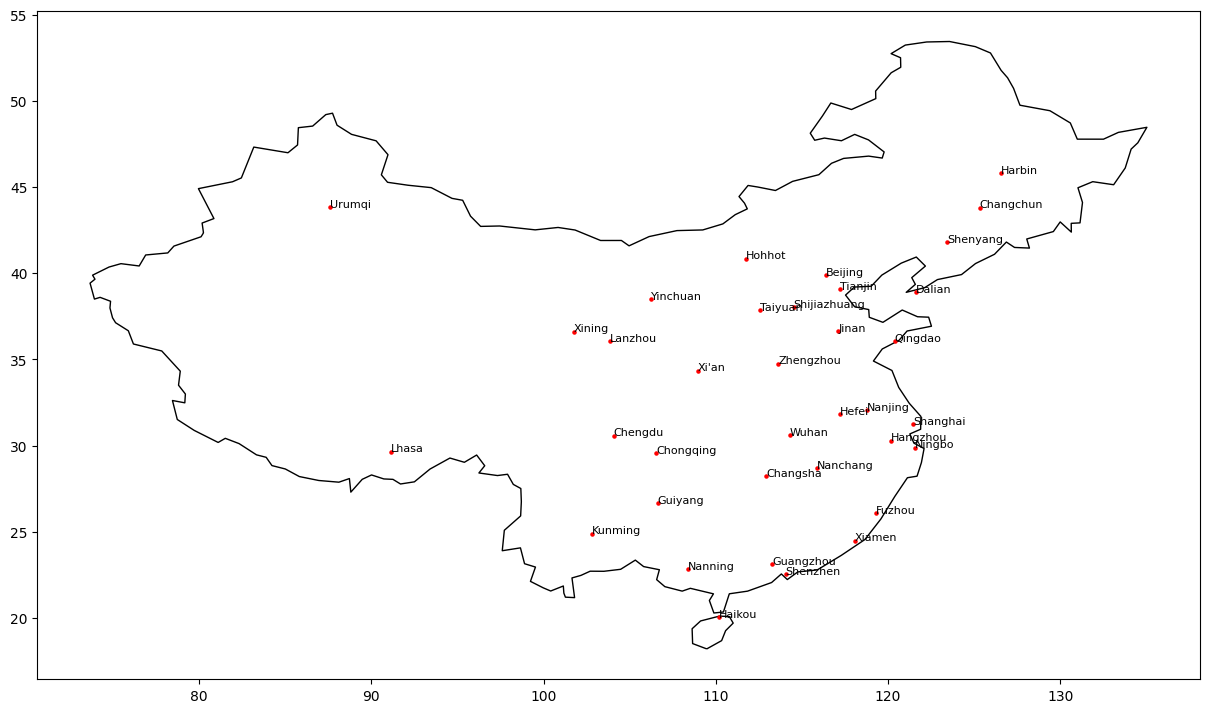

In [13]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

cities = {
    'Beijing': (116.407396, 39.904200),
    'Tianjin': (117.200983, 39.084158),
    'Shijiazhuang': (114.514893, 38.042805),
    'Taiyuan': (112.548879, 37.870590),
    'Hohhot': (111.751990, 40.841490),
    'Shenyang': (123.431475, 41.805698),
    'Dalian': (121.614682, 38.914003),
    'Changchun': (125.323544, 43.817071),
    'Harbin': (126.535319, 45.802160),
    'Shanghai': (121.473701, 31.230416),
    'Nanjing': (118.796877, 32.060255),
    'Hangzhou': (120.155070, 30.274084),
    'Ningbo': (121.550357, 29.874556),
    'Hefei': (117.227219, 31.820591),
    'Fuzhou': (119.296494, 26.074508),
    'Xiamen': (118.089425, 24.479834),
    'Nanchang': (115.858198, 28.682892),
    'Jinan': (117.120497, 36.651216),
    'Qingdao': (120.382640, 36.067082),
    'Zhengzhou': (113.625368, 34.746599),
    'Wuhan': (114.305393, 30.593099),
    'Changsha': (112.938814, 28.228209),
    'Guangzhou': (113.264385, 23.129112),
    'Shenzhen': (114.057868, 22.543099),
    'Nanning': (108.366543, 22.817002),
    'Haikou': (110.199890, 20.044220),
    'Chongqing': (106.551557, 29.563760),
    'Chengdu': (104.066541, 30.572269),
    'Guiyang': (106.630154, 26.647661),
    'Kunming': (102.832892, 24.880095),
    'Lhasa': (91.140856, 29.645554),
    'Xi\'an': (108.939840, 34.341574),
    'Lanzhou': (103.834304, 36.061089),
    'Xining': (101.778228, 36.617144),
    'Yinchuan': (106.232480, 38.486440),
    'Urumqi': (87.616848, 43.825592)
}

# Create a GeoDataFrame for the cities
cities_df = pd.DataFrame(cities.items(), columns=['City', 'Coordinates'])
cities_df['Coordinates'] = cities_df['Coordinates'].apply(Point)
cities_gdf = gpd.GeoDataFrame(cities_df, geometry='Coordinates')

# Load a map of China
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china = world[world.name == 'China']

# Plot the map
fig, ax = plt.subplots(figsize=(15, 15))
china.plot(ax=ax, color='white', edgecolor='black')
cities_gdf.plot(ax=ax, marker='o', color='red', markersize=5)

for city, coord in cities.items():
    ax.text(coord[0], coord[1], city, fontsize=8)

plt.show()
fig.savefig(os.path.join('/Users/zhaomengshan/Desktop/Air_pollution/Figure', f"36major_cities.png"))